## Recordatori de Python

#### Enumerate

In [ ]:
for a,b in enumerate(['a','b','c']):
    print(a,b)

0 a
1 b
2 c


#### zip

In [ ]:
for i in zip([1,2,3],[3,4,5,6]):
    print(i)

(1, 3)
(2, 4)
(3, 5)


## Descens del gradient d'una funció qualsevol

Suposem que tenim una funcio $f(\mathbf v) = \sum_{i=1}^n v_i^2$ que té per argument un vector de nombres reals $\mathbf v = (v_1, \dots, v_n)$ i que té com a sortida un únic nombre real:

In [ ]:
def suma_de_quadrats(v):
    return sum([v_i ** 2 for v_i in v])

suma_de_quadrats([2,2,2])

12

L'objectiu és calcular el **paràmetre** $\mathbf{v}$ que maximitza o minimitza aquesta funció, o el que és el mateix, la $\mathbf{v}$ que produeix el valor més alt o més baix possible de $f$.

Però abans de veure com fer això amb una funció de varies variables, mirem com ho fariem amb una funció d'una variable.

### De les derivades al gradient

Si $f$ és una funció d'una sola variable, la **derivada** de $f$ a un punt $x$ mesura la variació de la funció quan fem un petit canvi a la $x$, i es defineix com el límit de la diferència de dos quocients:

$$ \lim_{h \rightarrow 0} \frac{f(x + h) - f(x)}{h} $$

In [ ]:
import math

def truncate(number, decimals=0):
    """
    Returns a value truncated to a specific number of decimal places.
    """
    if not isinstance(decimals, int):
        raise TypeError("decimal places must be an integer.")
    elif decimals < 0:
        raise ValueError("decimal places has to be 0 or more.")
    elif decimals == 0:
        return math.trunc(number)

    factor = 10.0 ** decimals
    return math.trunc(number * factor) / factor

def quadrat(x):
    return x*x

def dif_quo(x, f=quadrat, h=1e-6):
    return truncate((f(x+h) - f(x))/h, 5)

dif_quo(2.0, quadrat)

4.0

Hi ha moltes funcions de les quals poden calcular la derivada analíticament, com per exemple $x^2$:

In [ ]:
def d_a_quadrat(x):
    # la derivada de x**2 és 2*x
    return 2*x

d_a_quadrat(2.0)

4.0

<function matplotlib.pyplot.show(close=None, block=None)>

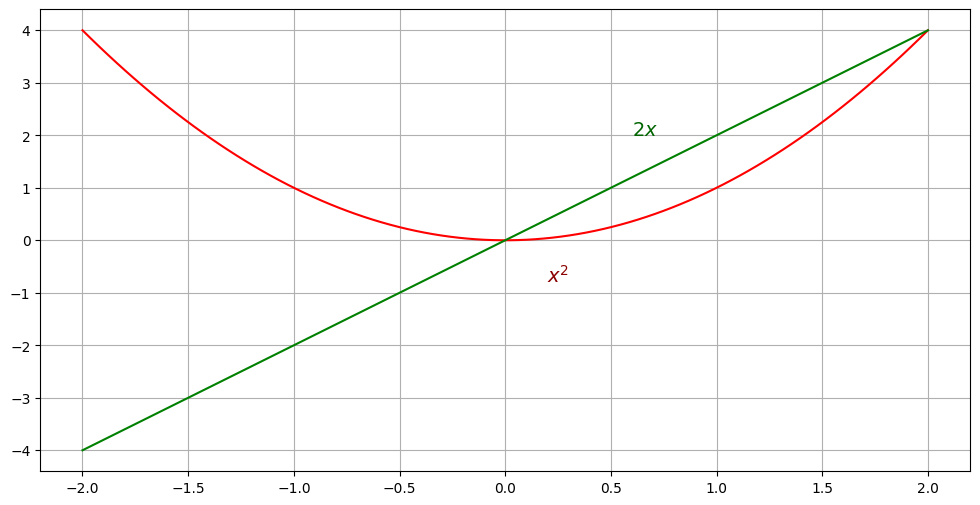

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

font1 = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }

font2 = {'family': 'serif',
        'color':  'darkgreen',
        'weight': 'normal',
        'size': 14,
        }

x = np.linspace(-2,2, 100)
f = [i**2 for i in x]
df = [2*i for i in x]
plt.text(0.2, -0.8, r'$x^2$', fontdict=font1)
plt.text(0.6, 2.0, r'$2x$', fontdict=font2)
plt.plot(x,f, 'r-')
plt.plot(x,df, 'g-')
plt.gcf().set_size_inches((12,6))
plt.grid()
plt.show

**Però que hem de fer quan no tenim una fòrmula analítica per la derivada?**

Doncs no queda més remei que usar l'aproximació de la diferència de quocients!

Si el pas és prou petit no notarem la diferència, tot i que el concepte "prou petit" és una mica indefinit: la funció pot variar molt en qualsevol interval i pot requerir una $h$ diferent per zones diferents.

**Perquè és útil la derivada per optimitzar una funció?**

La derivada d'una funció proporciona informació sobre com canvia la funció en un punt determinat.

+ Els màxims i mínims d'una funció corresponen als punts on la seva derivada s'anul·la. Això és essencial per optimitzar funcions, ja que sovint estem interessats en trobar els valors màxims o mínims d'una funció en un cert domini.

+ La derivada també proporciona informació sobre la pendent d'una funció en un punt concret. En l'optimització, és crucial entendre com canvia la funció en diferents punts, i la derivada ens diu si la funció està augmentant o disminuint en aquest punt.

### Gradient

Quan $f$ és una funció de varies variables, té varies derivades parcials, cada una de les quals indica com varia $f$ quan fem un petit canvi en la variable corresponent.

La derivada parcial respecte a una variable es pot calcular considerant només canvis en aquella variable i mantenint la resta constants:

In [ ]:
def dif_quo_parcial(v, f, i, h=1e-6):
    w = [v_j + (h if j==i else 0) for j, v_j in enumerate(v)]
    return truncate((f(w) - f(v))/h)

El **gradient** de la funció $f$, que és un vector format per les derivades parcials de la funció, ens dóna la **direcció en la qual la funció creix més ràpidament**.

$$\nabla {f} = (\frac{\partial f}{\partial v_1}, \dots, \frac{\partial f}{\partial v_n})$$

In [ ]:
def gradient(v, f, h=1e-6):
    return[dif_quo_parcial(v,f,i,h) for i,_ in enumerate(v)]

def f(v):
    return sum(v_i**2 for v_i in v)

v = [2,2,2]
print(f(v), gradient(v,f))

12 [4, 4, 4]


## Optimització

### Algorisme de  Nelder-Mead
La forma més simple de trobar el mínim d'una funció és l'**algorisme de Nelder-Mead**: http://www.benfrederickson.com/numerical-optimization/

Aquest algorisme té com a principal limitació el nombre d'avaluacions que s'han de fer de la funció a cada pas. Com més dimensions té la funció, més avaluacions hem de fer! Això és un limitació molt gran quan treballem amb funcions de moltes dimensions!

### Algorisme de descens del gradient

Una estratègia alternativa per **minimitzar** una funció és repetir la següent estratègia (**algorisme de descens del gradient**):

+ Col·locar-se en una solució potencial aleatòria (un valor aleatori de $\mathbf{v}$)
+ Calcular el vector gradient en aquell punt.
+ Fer un petit pas (variar el valor de $\mathbf{v}$) en la direcció (*contraria*) del vector gradient.

La cerca s'acaba quan el vector gradient és zero (o molt petit) o quan el canvi en el valor de $f$ és molt petit. En aquests casos, presumiblement hem trobat un mínim.

Si la funció és unimodal (conté un únic mínim), hem trobat **la** nostra solució. Sinó, pot ser que estem en un mínim local que no sigui global.

En general, per funcions multimodals d'alta dimensió, és impossible saber si el mínim que hem trobat és el mínim global.

### Com utilitzar el gradient

És fàcil veure que la funció *suma de quadrats*, $\sum_i v_i^2$, pren el seu mínim valor quan totes les $v$ són 0.

Anem a comprovar-ho pel cas de dimensió 3. Per fer-ho, encara ens cal una funció que varii el valor de $\mathbf v$ en la direcció contrària del gradient, que anomenarem ``pas``:

In [ ]:
def gradient_suma_quadrats(v):
    return [2 * v_i for v_i in v]

def pas(v,grad,mida_pas):
    return [v_i - mida_pas * g_i for v_i, g_i in zip(v,grad)]

Començarem escollint un valor a l'atzar i llavors anirem movent-nos en la direcció contrària al gradient.

Ens aturarem quan el canvi en el valor de la funcio sigui *prou petit*.

Implementarem el concepte *prou petit* amb aquesta funció distància:

In [ ]:
import random
import numpy as np

def distancia(v1,v2):
    import numpy as np
    import math
    v = np.array(v1)-np.array(v2)
    return math.sqrt(sum(v_i ** 2 for v_i in v))

In [ ]:
tolerancia = 1e-15
v = [random.randint(-10,10) for i in range(3)]

while True:
    gradient = gradient_suma_quadrats(v)
    next_v = pas(v,gradient,0.01)
    if distancia(next_v,v) < tolerancia:
        break
    v = next_v
print(v)


[2.936842827872218e-14, -3.9157904371629563e-14, -9.789476092907391e-15]


### El pas

La **mida del pas** és un aspecte delicat: si és massa petita avançarem massa lentament; si és massa gran, podem perdre el màxim (mínim) ques estem buscant.

Per tant, a l'hora de triar la mida del pas hem de considerar quina política seguir:

+ Fer servir una mida de pas constant. En aquest cas la mida del pas defineix la precisió de la solució.
+ Anar disminuint la mida del pas a mesura que passa el temps.
+ A cada pas, cercar la mida que minimitza el valor de funció objectiu.

La darrera opció és bona però molt cara. El màxim que podriem fer és considerar un conjunt fix de mides.

In [ ]:
mides_pas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

### Plantejament general d'un problema d'aprenentatge supervisat

En general, tenim els següents elements:

+ Un conjunt de dades $\{(\mathbf x_i,y_i)\}$.
+ Un model $f_\theta$ que depèn d'uns paràmetres $\theta$.
+ Una funció objectiu $L$, que volem minimitzar, que representa la discrepància entre les dades i el model $f_\theta$.
+ La funció que representa el gradient de la funció objectiu, $L'$, respecte dels paràmetres.


El cas més normal és que $L$  representi els errors d'un model $f$ de representació de les dades $(\mathbf x_i, y_i)$, en funció dels seus paràmetres $\theta$, i volem trobar els paràmetres que minimitzen l'error:

$$ L = \frac{1}{n} \sum_{i} (y_i - f(\mathbf x_i,\theta))^2 $$

Per exemple, $(\mathbf x,y)$ pot representar:

+ $\mathbf x$: el comportament d'un jugador de "Candy Crush"; $y$: les compres mensuals que fa de "vides".
+ $\mathbf x$: les dades de funcionament del motor d'un cotxe; $y$: la probabilitat d'un error de funcionament del motor.
+ $\mathbf x$: les dades financeres d'un client d'un banc; $y$: la seva qualificació (si/no) per un préstec.

> El cas que $y$ és un valor real, el problema s'anomena *regressió*.
> El cas que $y$ és un valor binari o categòric, el problema s'anomena *classificació*.

Llavors els descens del gradient es pot implementar així:

1. Inicialitza els **paràmetres**: Comença inicialitzant els paràmetres del model, $\theta$, de manera aleatòria: $\theta_0$.

2. Defineix una **funció de cost** $L(x,y,\theta)$ que mesuri quan bé ho fa el model amb els paràmetres $\theta$. L'objectiu és minimitzar aquesta funció.

3. Calcula el **gradient de la funció de cost** $L'(x,y,\theta)$ respecte de cada paràmetre. El gradient apunta a la direcció de l'augment més pronunciat de la funció de cost.

4. Actualitza els **paràmetres**: Ajusta els paràmetres del model en la direcció contrària del gradient per reduir el cost. Això es fa utilitzant la següent fórmula d'actualització ($\alpha$ és la taxa d'aprenentatge, que controla la mida del pas en cada iteració. És un hiperparàmetre que s'ha de fixar prèviament i pot variar segons el problema):

$$ \theta_{i+1} = \theta_{i} - \alpha * L'(x,y,\theta_i)$$



5. Repeteix: Repeteix els passos 3 i 4 durant un nombre fix d'iteracions, fins que els canvis en els paràmetres es tornen molt petits o fins quan la funció de cost arriba a un mínim dins d'una tolerància prèviament definida.

**Observació important:** Aquesta funció avalua a cada pas la funció de cost $L$ tal i com està definida, és a dir, calculant un sumatori de $f(x,y,\theta)$ per **totes** les dades $(x_i,y_i)$ a cada iteració. I les dades poden ser moltes...

### Descens del gradient estocàstic

**Si el volum de dades és molt gran, $f$ és costosa i hem de fer moltes iteracions, aquesta estratègia no és viable**.

Però podem aprofitar que la funció d'error que estem avaluant quan aprenem un model a partir de dades és de tipus additiu: es construeix a partir de la suma dels errors de cada una de les dades respecte del model.

En aquest cas podem usar la tècnica **Stochastic Gradient Descend** (SGD), que consisteix en calcular el gradient (i fer un pas en la direcció del mínim) a partir de l'estimació d'**una única dada** (o d'un conjunt petit de dades o *minibatch*).

Una de les condicions d'aquest algorisme (per assegurar que convergim al mínim) és que a cada cicle iterarem sobre les dades en **ordre aleatori**.

1. Comença inicialitzant els paràmetres del model de manera aleatòria.
2.  Defineix una funció de cost que mesuri quan bé ho fa el model. L'objectiu és minimitzar aquesta funció.
3. Bucle d'iteració:
+ Tria una dada aleatòria: En cada iteració, selecciona una dada aleatòria d'entrenament del teu conjunt de dades. Aquesta mostra pot ser un exemple individual o un petit lot (mini-batch) d'exemples.
+ Calcula el gradient: Calcula el gradient de la funció de cost respecte als paràmetres utilitzant només aquesta dada. Aquest gradient representa la direcció de l'augment més pronunciat de la funció de cost basat en aquesta mostra en particular.
+ Actualitza els paràmetres: Ajusta els paràmetres del model en la direcció contrària del gradient calculat per a la mostra actual.
4. Repeteix el bucle: Continua seleccionant mostres aleatòries, calculant gradients i actualitzant els paràmetres durant un nombre fix d'iteracions o fins que es compleixin criteris de convergència.

## Gradient Descent i Regressió Lineal



El model de regressió lineal assumeix una relació entre les dades i el model d'aquest tipus:

$$ y_i = w_1 x_i + w_2$$

La funció de cost serà:

$$ L = \frac{1}{n} \sum_i (y_i - w_1 x_i - w_2)^2$$

Les derivades de la funció de cost són:

$$ \frac{\partial f}{\partial w_1} = \frac{1}{n} \sum_i - 2 x_i (y_i - w_1 x_i - w_2) $$

$$ \frac{\partial f}{\partial w_2} = \frac{1}{n} \sum_i - 2 (y_i - w_1 x_i - w_2) $$

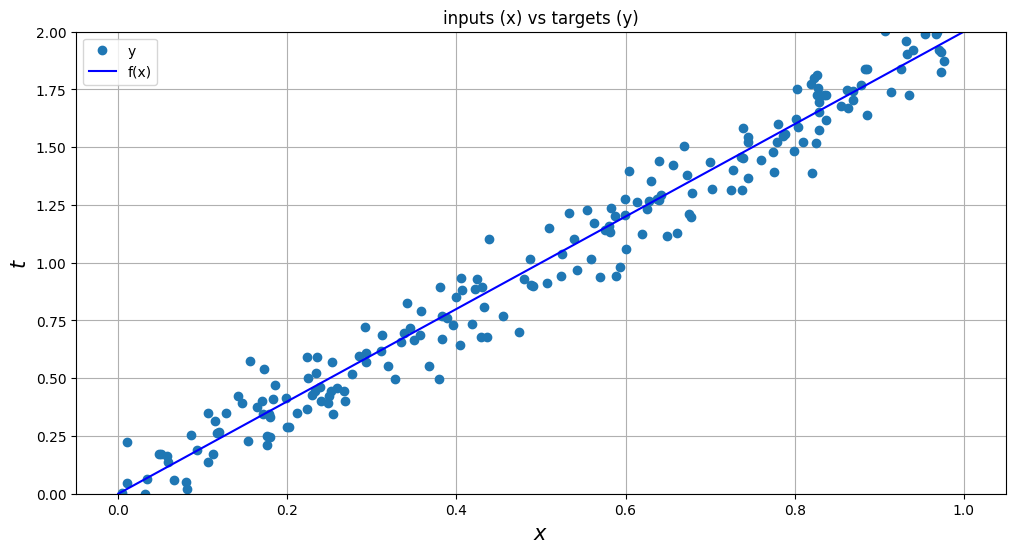

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# generació de les dades (sorolloses) per y=2x
x = np.random.uniform(0,1,200)
def true_f(x): return x*2
noise_variance =0.1
noise = np.random.randn(x.shape[0])*noise_variance
y = true_f(x) + noise

N = len(x)

# El nostre model y = x * w1 + w_2
def f(x,w1, w2): return x * w1 + w2

# La funció de cost
def L(x,y,w1, w2):
    return np.square(y - w1*x - w2)

plt.plot(x, y, 'o', label='y')
plt.plot([0, 1], [true_f(0), true_f(1)], 'b-', label='f(x)')
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$t$', fontsize=15)
plt.ylim([0,2])
plt.title('inputs (x) vs targets (y)')
plt.grid()
plt.legend(loc=2)
plt.gcf().set_size_inches((12,6))
plt.show()

In [ ]:
print(L(x, y, 2.0,0.0).sum()/N)

0.010410450220436653


El mínim de la funció de cost no està exactament al valor de la $f$ que hem definit: tenim un conjunt de dades finites i sorolloses!

In [ ]:
# definim els gradients de la funció de cost

def gradient_1(w1, w2, x, y):
    return (-2 * x * (y  - w1*x - w2)).sum()/N

def gradient_2(w1, w2, x, y):
    return (-2 * (y  - w1*x - w2)).sum()/N

# definim un pas (que depèn del mòdul del gradient)
def delta_w1(w1, w2, x, y, learning_rate):
    return learning_rate * gradient_1(w1, w2, x, y)

def delta_w2(w1, w2, x, y, learning_rate):
    return learning_rate * gradient_2(w1, w2, x, y)

# valor inicial del paràmetre
w1 = w1_ini = 5.0
w2 = w2_ini = -2.0

#learning_rate = 0.1
learning_rate = 0.01
#learning_rate = 0.001


nb_of_iterations = 2000

#anirem guardant les solucions (de w_1) i els seus costos
print("Loss: ", L(x,y,w1,w2).sum()/N)

for i in range(nb_of_iterations):
    w1 = w1 - delta_w1(w1, w2, x, y, learning_rate)
    w2 = w2 - delta_w2(w1, w2, x, y, learning_rate)
    if i%150 == 0: print("Loss: ", L(x,y,w1,w2).sum()/N)

print("Paràmetres: ",w1,w2)

Loss:  0.9728242851378325
Loss:  0.9636213509000524
Loss:  0.5684707274616287
Loss:  0.3907179329172539
Loss:  0.2695892986984873
Loss:  0.18703005595281788
Loss:  0.13075926477260397
Loss:  0.09240618012178312
Loss:  0.06626545830885934
Loss:  0.048448447159008784
Loss:  0.0363047164470127
Loss:  0.028027784117276387
Loss:  0.022386386888057625
Loss:  0.018541319485065818
Loss:  0.015920595800341945
Paràmetres:  2.238768261000276 -0.1380661128972152


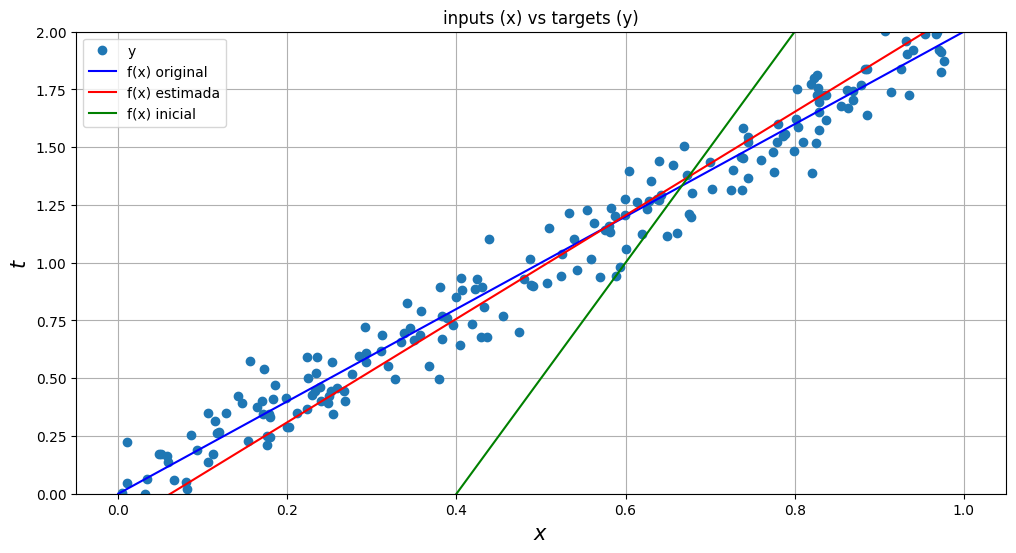

In [ ]:
def est_f(x): return w1*x+w2
def ini_f(x): return w1_ini*x+w2_ini

plt.plot(x, y, 'o', label='y')
plt.plot([0, 1], [true_f(0), true_f(1)], 'b-', label='f(x) original')
plt.plot([0, 1], [est_f(0), est_f(1)], 'r-', label='f(x) estimada')
plt.plot([0, 1], [ini_f(0), ini_f(1)], 'g-', label='f(x) inicial')
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$t$', fontsize=15)
plt.ylim([0,2])
plt.title('inputs (x) vs targets (y)')
plt.grid()
plt.legend(loc=2)
plt.gcf().set_size_inches((12,6))
plt.show()

Encara podem iterar més!!

In [ ]:
while L(x,y,w1,w2).sum()/N > 0.011156881:
    w1 = w1 - delta_w1(w1, w2, x, y, learning_rate)
    w2 = w2 - delta_w2(w1, w2, x, y, learning_rate)
    print("Loss: ", L(x,y,w1,w2).sum()/N)

print("Paràmetres: ",w1,w2)

Loss:  0.015247695044011144
Loss:  0.015235094663903905
Loss:  0.015222526444269411
Loss:  0.015209990303023151
Loss:  0.015197486158290125
Loss:  0.015185013928404309
Loss:  0.015172573531908116
Loss:  0.015160164887551855
Loss:  0.01514778791429323
Loss:  0.015135442531296785
Loss:  0.015123128657933384
Loss:  0.01511084621377968
Loss:  0.015098595118617593
Loss:  0.015086375292433807
Loss:  0.015074186655419188
Loss:  0.015062029127968345
Loss:  0.015049902630679044
Loss:  0.015037807084351727
Loss:  0.01502574240998895
Loss:  0.015013708528794925
Loss:  0.015001705362174971
Loss:  0.014989732831735015
Loss:  0.014977790859281056
Loss:  0.01496587936681867
Loss:  0.014953998276552525
Loss:  0.014942147510885833
Loss:  0.01493032699241986
Loss:  0.014918536643953413
Loss:  0.01490677638848236
Loss:  0.014895046149199094
Loss:  0.014883345849492064
Loss:  0.014871675412945238
Loss:  0.014860034763337636
Loss:  0.014848423824642815
Loss:  0.014836842521028383
Loss:  0.01482529077685549

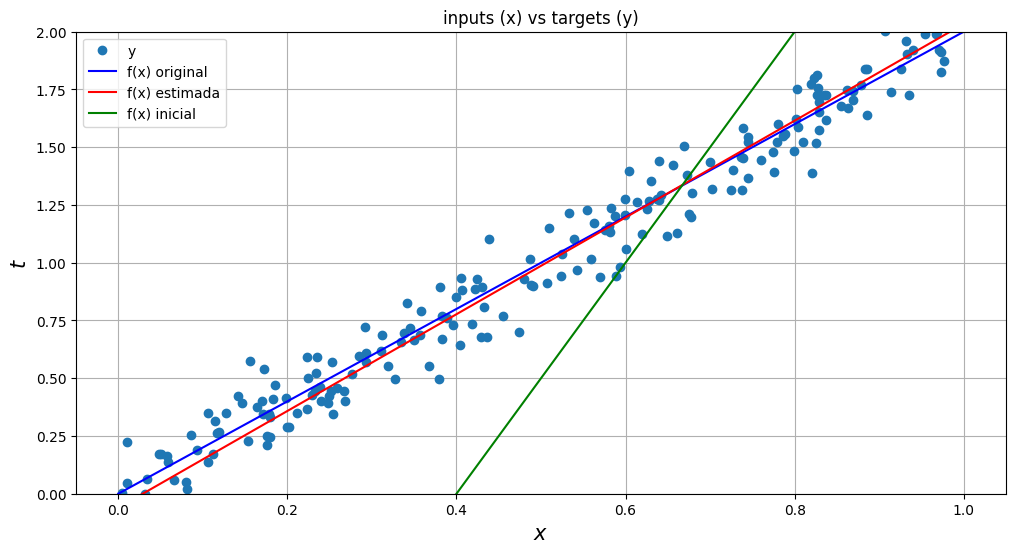

In [ ]:
def est_f(x): return w1*x+w2
def ini_f(x): return w1_ini*x+w2_ini

plt.plot(x, y, 'o', label='y')
plt.plot([0, 1], [true_f(0), true_f(1)], 'b-', label='f(x) original')
plt.plot([0, 1], [est_f(0), est_f(1)], 'r-', label='f(x) estimada')
plt.plot([0, 1], [ini_f(0), ini_f(1)], 'g-', label='f(x) inicial')
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$t$', fontsize=15)
plt.ylim([0,2])
plt.title('inputs (x) vs targets (y)')
plt.grid()
plt.legend(loc=2)
plt.gcf().set_size_inches((12,6))
plt.show()